In [1]:
import numpy as np

import tensorflow as tf
from sklearn.model_selection import train_test_split

import mlflow
import mlflow.tensorflow
import optuna

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
x = np.random.randn(5000)
y = x**3 + 2 * np.random.randn(5000)

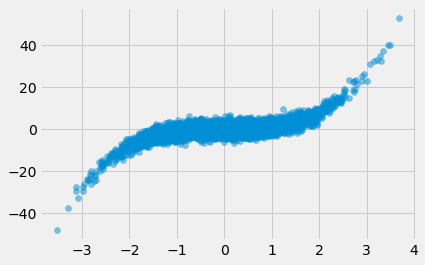

In [3]:
plt.scatter(x, y, alpha=.5)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8)

In [5]:
mlflow.tensorflow.autolog()

In [6]:
def objective(trial):
    
    with mlflow.start_run():

        model = tf.keras.Sequential([

            tf.keras.layers.Dense(
                16, 
                input_shape=(1,),
                kernel_initializer='lecun_normal',
                activation='selu'),

            tf.keras.layers.Dense(
                32, 
                kernel_initializer='lecun_normal',
                activation='selu'),

            tf.keras.layers.Dense(
                64, 
                kernel_initializer='lecun_normal',
                activation='selu'),

            tf.keras.layers.Dense(
                16, 
                kernel_initializer='lecun_normal',
                activation='selu'),

            tf.keras.layers.Dense(1)

        ])

        LEARNING_RATE = trial.suggest_loguniform('lr', 1e-6, 1e-2)
        print(LEARNING_RATE)

        model.compile(
            loss='mse', 
            optimizer=tf.keras.optimizers.RMSprop(
                learning_rate=LEARNING_RATE))

        callbacks = [
            tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
            tf.keras.callbacks.ReduceLROnPlateau(patience=4, factor=.5)
        ]

        history = model.fit(
            x_train, 
            y_train, 
            validation_data=(x_test, y_test),
            epochs=100,
            callbacks=callbacks,
            verbose=0
        )

        test_metric = model.evaluate(x_test, y_test)
    
    return test_metric

In [7]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

[I 2022-01-25 13:11:34,888] A new study created in memory with name: no-name-c78a2cf7-83fe-4771-b896-6320f59e0b38


4.968120125864347e-06
INFO:tensorflow:Assets written to: C:\Users\aleks\AppData\Local\Temp\tmpaja8ue_w\model\data\model\assets
32/32 [==============================] - 0s 2ms/step - loss: 9.7414


[I 2022-01-25 13:12:41,996] Trial 0 finished with value: 9.741427421569824 and parameters: {'lr': 4.968120125864347e-06}. Best is trial 0 with value: 9.741427421569824.


0.001590066429407252
INFO:tensorflow:Assets written to: C:\Users\aleks\AppData\Local\Temp\tmp06shs210\model\data\model\assets
32/32 [==============================] - 0s 2ms/step - loss: 4.3713


[I 2022-01-25 13:13:21,844] Trial 1 finished with value: 4.3712968826293945 and parameters: {'lr': 0.001590066429407252}. Best is trial 1 with value: 4.3712968826293945.


5.769334013743867e-06
INFO:tensorflow:Assets written to: C:\Users\aleks\AppData\Local\Temp\tmp11iaz3d2\model\data\model\assets
32/32 [==============================] - 0s 2ms/step - loss: 10.2295


[I 2022-01-25 13:14:24,936] Trial 2 finished with value: 10.229483604431152 and parameters: {'lr': 5.769334013743867e-06}. Best is trial 1 with value: 4.3712968826293945.


4.1220158681477695e-05
INFO:tensorflow:Assets written to: C:\Users\aleks\AppData\Local\Temp\tmpz61etxx6\model\data\model\assets
32/32 [==============================] - 0s 2ms/step - loss: 5.3153


[I 2022-01-25 13:15:26,566] Trial 3 finished with value: 5.3152995109558105 and parameters: {'lr': 4.1220158681477695e-05}. Best is trial 1 with value: 4.3712968826293945.


2.059485360066462e-06
INFO:tensorflow:Assets written to: C:\Users\aleks\AppData\Local\Temp\tmpkrvosk9l\model\data\model\assets
32/32 [==============================] - 0s 2ms/step - loss: 13.7350


[I 2022-01-25 13:16:28,419] Trial 4 finished with value: 13.735010147094727 and parameters: {'lr': 2.059485360066462e-06}. Best is trial 1 with value: 4.3712968826293945.


In [11]:
study.best_params

{'lr': 0.005001575647990362}

In [13]:
model = tf.keras.Sequential([

    tf.keras.layers.Dense(
        16, 
        input_shape=(1,),
        kernel_initializer='lecun_normal',
        activation='selu'),

    tf.keras.layers.Dense(
        32, 
        kernel_initializer='lecun_normal',
        activation='selu'),

    tf.keras.layers.Dense(
        64, 
        kernel_initializer='lecun_normal',
        activation='selu'),

    tf.keras.layers.Dense(
        16, 
        kernel_initializer='lecun_normal',
        activation='selu'),

    tf.keras.layers.Dense(1)

])

LEARNING_RATE = study.best_params['lr']
print(LEARNING_RATE)

model.compile(
    loss='mse', 
    optimizer=tf.keras.optimizers.RMSprop(
        learning_rate=LEARNING_RATE))

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=4, factor=.5)
]

history = model.fit(
    x_train, 
    y_train, 
    validation_data=(x_test, y_test),
    epochs=100,
    callbacks=callbacks,
    verbose=0
)

test_metric = model.evaluate(x_test, y_test)

0.005001575647990362
32/32 [==============================] - 0s 2ms/step - loss: 3.9531
